<a href="https://colab.research.google.com/github/SamuelVanWilson/Machine-Learning-Daily-Projects/blob/main/DAY_2_MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDIKSI HARGA RUMAH DENGAN MULTIPLE LINEAR REGRESSION**

###IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

sekarang mari kita bahas 2 library awal yang digunakan untuk mengolah data yakni `pandas` dan `numpy`.

`pandas` digunakan untuk manipulasi data (seperti membersihkan, membaca data dalam bentuk tabel).

`numpy` digunakan untuk komputasi numerik (berhubungan dengan operasi matematika), kebanyakan model menggunakan numpy untuk operasi matematika yang lebih kompatibel

<hr>
-

selanjutnya kita akan bahas library untuk machine learning yaitu `sklearn` sebetulnya kita hanya mengambil beberapa fungsi yang kita perlukan saja, yaitu hanya 3 fungsi: `train_test_split`, `LinearRegression`, `mean_squared_error`.

`train_test_split` digunakan untuk membagi dataset menjadi data training dan data testing, seperti 80% data training dan 20% data testing

`LinearRegression` digunakan untuk model machine learning dengan algoritma regresi linear

`mean_squared_error` digunakan untuk menghitung error/akurasi model, ini sangat berguna untuk menghitung seberapa baik model bekerja
<hr>
-

lanjut lagi kita akan bahas library untuk visualisasi data yaitu `matplotlib` dan `seaborn`

`matplotlib` digunakan untuk visualisasi data(plot, dan grafik)

`seaborn` digunakan untuk visualisasi data yang lebih menarik karena seaborn dibangun diatas matplotlib

###LOAD DATASET DARI CSV

In [2]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)

variabel `url` untuk mengambil data csv, terus variabel `data` digunakan untuk membaca file csv yang sudah diambil di variabel `url`

###MELAKUKAN EXPLORARY DATA ANALYSIS SEDERHANA


Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Deskripsi Statistik


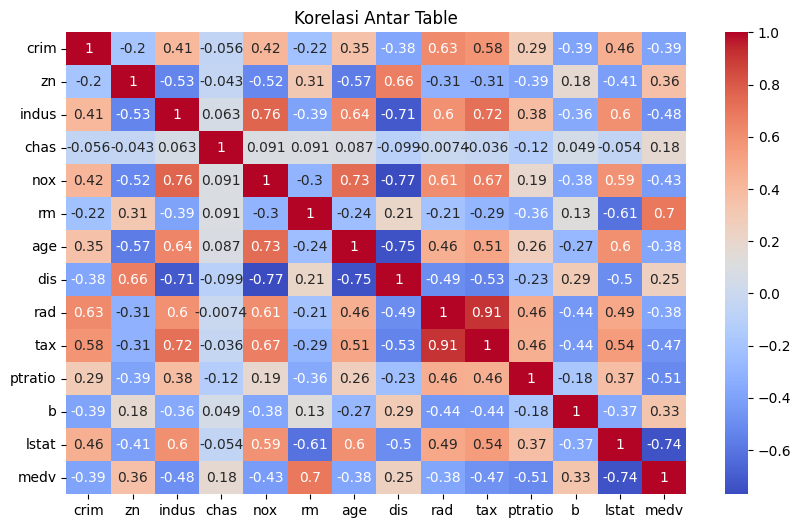

In [3]:
print("\nInformasi Dataset")
data.info()

print("\nDeskripsi Statistik")
data.describe()

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Table")
plt.show()

**Explorary Data Analysis** atau disebut juga **EDA** merupakan bagian dari pengolahan data sebelum melakukan modeling, ini sangat penting karena model machine learning tergantung pada dataset yang kita milikin. Dataset harus bersih dan tidak boleh kotor agar model akurat dan tidak bias, data kotor seperti missing values, data yang nilainya outlier, dan fitur yang tidak perlu. Jadi, **EDA** berguna untuk:
<ul>
 <li>Memahami struktur data</li>
<li>Mendeteksi masalah data(outlier, missing value, dll)</li>
 <li>Membersihkan fitur yang tidak diperlukan</li>
 <li>Menemukan pola/relasi antar variabel</li>
</ul>

<hr>
-

`data.info()` digunakan untuk melihat informasi dataset

`data.describe()` digunakan untuk melihat deskripsi dataset

<hr>
-

`plt.figure(figsize=(10,6))` mengatur ukuran gambar statistik (10 inci lebar, 6 inci lebar)
<br>

`sns.heatmap(data.corr(), annot=True, cmap="coolwarm")` fungsi seaborn yang digunakan untuk meembuat peta panas(heatmap). parameter `data.corr` untuk menghitung matriks korelasi antar kolom numerik, ini fungsi yang penting yang menentukan keterkaitan antar variabel(fitur). `annot=True` untuk menampilkan angka persentase korelasi antar variabel jika tidak menggunakan parameter ini, maka hanya warna suhu peta saja yang ditampilkan. `cmap="coolwarm"` memilih jenis skema warna

###PERSIAPAN DATA

In [4]:
x = data.drop("medv", axis=1)
y = data['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dibagian step ini, kita mempersiapkan data untuk memisahkan data training(data untuk dilatih) dan data test(data untuk diuji). tapi kita masih belum melatih model dengan data data ini, kita hanya mempersiapkan nya kedalam sebuah variabel

<hr>
-

variabel `x` digunakan untuk fitur/input, ini berguna sebagai bahan memprediksi model agar akurat. `data.drop("medv", axis=1)` fungsi ini mengambil dataset dan menghapus kolom `medv` di paramater 1 dan di parameter ke 2 `axis=1` untuk memberitahu kalau kita ingin menghapus kolom dan bukan baris (**kita sudah mendapatkan kolom sebagai fitur/kolom**)

<hr>
-

variabel `y` digunakan sebagai target/output ini berguna sebagai hasil prediksi untuk model. `data["medv"]` kita hanya memilih dataset dengan kolom `medv`

<hr>
-

variabel `x_train, x_test, y_train, y_test` akan digunakan sebagai data training dan data test karena nilainya berupa `x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)`.
- **penjelasan dari ke 4 variabel tersebut**:  
  - `X_train`: Fitur untuk training (80% data).  
  - `X_test`: Fitur untuk testing (20% data).  
  - `y_train`: Target untuk training (80% data).  
  - `y_test`: Target untuk testing (20% data).

fungsi `train_test_split(x, y, test_size=0.2, random_state=42)` digunakan untuk mengembalikan nilai-nilai yang akan disimpan oleh variabel yang kita deklarasikan, mari kita bahas parameter nya

- **Parameter**:  
  - `X`: Fitur-fitur (input).  
  - `y`: Target (output).  
  - `test_size=0.2`: 20% data digunakan untuk testing.  
  - `random_state=42`: mengontrol pengacakan data kita bisa mengubahnya juga seperti "111", kualitas model akan tetap sama, dan tidak berpengaruh, hanya komposisi data training dan data test

###MEMBUAT DAN MELATIH MODEL

In [5]:
model = LinearRegression()

model.fit(x_train,y_train)

feature_importance = pd.DataFrame({
 'Fitur': x.columns,
 'Koefisien': model.coef_
}).sort_values(by='Koefisien', ascending=False)

print("\n Pengaruh fitur terhadap harga rumah")
print(feature_importance)


 Pengaruh fitur terhadap harga rumah
      Fitur  Koefisien
5        rm   4.438835
3      chas   2.784438
8       rad   0.262430
2     indus   0.040381
1        zn   0.030110
11        b   0.012351
6       age  -0.006296
9       tax  -0.010647
0      crim  -0.113056
12    lstat  -0.508571
10  ptratio  -0.915456
7       dis  -1.447865
4       nox -17.202633


variabel `model` digunakan untuk membuat model dengan algoritma **linear regression**

---

`model.fit()` digunakan untuk melatih model, dengan parameter 1 `x_train` sebagai fitur/input training, dan parameter 2 `y_train` sebagai target/output training

---

variabel `feature_importance` berguna untuk mengurutkan fitur berdasarkan pengaruhnya yakni harga rumah/`medv` sebagai target/output. `pd.DataFrame()` berguna untuk membuat tabel data dari __dictionary__.

parameternya berupa dictionary. ` 'fitur' : x.columns`, `x.columns` mengambil nama kolom dari variabel `x` (fitur). `'Koefesien' : model.coef_`, `model.coef_` berguna buat melihat bobot angka yang menunjukan seberapa besar dan berpengaruh(naik/turun) suatu fitur terhadap harga rumah, sebetulnya ini merupakan konsep **koefesien** dalam regressi linear

terakhir fungsi `sort_values()` berguna untuk mengurutkan hasil dari variabel `feature_importance` berdasarkan kolom `Koefisien` dari terbesar ke terkecil karena di parameter 1 `by='Koefisien' ` mengurutkan sortirannya berdasarkan kolom `Koefisien` dan paramter ke 2 nya `ascending=False` mengurutkan dari besar ke kecil, jika nilainya `True` mengurtkan dari kecil ke besar

###Evaluasi Model


Mean Squared Error: 24.29


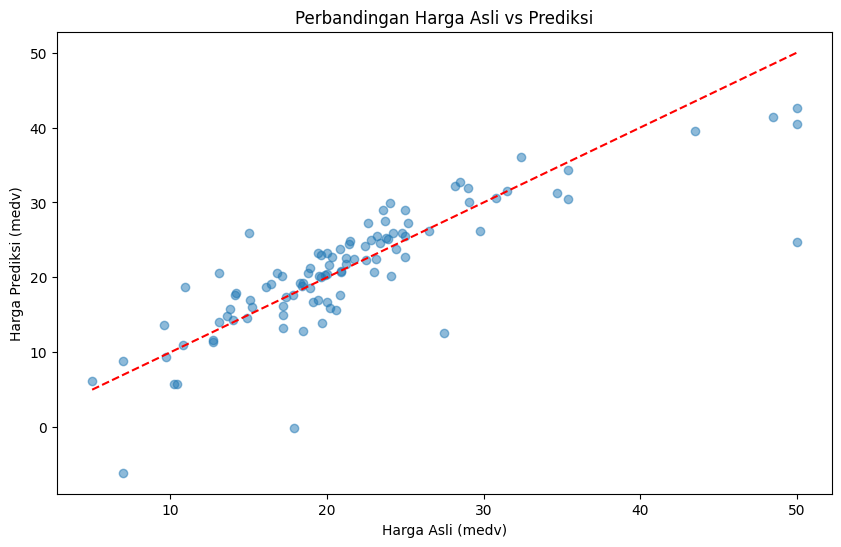

In [6]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Garis ideal
plt.xlabel('Harga Asli (medv)')
plt.ylabel('Harga Prediksi (medv)')
plt.title('Perbandingan Harga Asli vs Prediksi')
plt.show()

variabel `y_pred` digunakan untuk memprediksi target("harga rumah") berdasarkan fitur data test `x_test`

---

setelah menprediksi target, kita sudah mempunyai variabel target prediksi, baru variabel ini kita ukur seberapa akurat prediksi yang dilakukan oleh model dengan menggunakan fungsi `mean_squared_error()` parameter 1 sebagai data yang benar/jawaban yang benar, dan parameter ke 2 sebagai data yang diprediksi/jawaban dari model. nah nilai fungsi ini disebut `mse` makanya kita simpan dalam variabel `mse` semakin rendah `mse` nya semakin akurat model yang diprediksi, ini sangat penting untuk memberikan gambaran seberapa baik performa model yang diberikan, jika `mse` terlalu besar maka model perlu diperbaikin

`{mse:.2f}` syntax ini untuk menampilkan nilai `mse` ke konsol dengan format 2 angka dibelakang koma